In [1]:
import pandas as pd
from pandas import DataFrame as dframe
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy.random import choice

from jax import random, vmap
import jax.numpy as jnp
import numpyro
import numpyro.distributions as dist
from numpyro import sample, plate, param, deterministic
from numpyro.optim import Adam, Minimize
from numpyro.infer.autoguide import AutoLaplaceApproximation
from numpyro.diagnostics import hpdi, print_summary
from numpyro.infer import SVI, Trace_ELBO, init_to_value, Predictive

import utils
from utils import dotdict
from utils.data import data, scale
from utils.analysis import * # precis, cov2cor
from utils.stats import * # r::stats functions (rnorm, dnorm, ...)
from utils.plots import init_dag, scatter, shade
utils.init() # init plotting styles and hush warnings
np.random.seed(8964) # seed

## Easy

### 5E1

(2) and (4).

### 5E2

$\mu_i = \alpha + \beta_L L + \beta_P P$, where $\mu_i$ is the mean animal diversity, $L$ is the latitude, and $P$ is the plant diversity. 

### 5E3

$\mu_i = \alpha + \beta_F F + \beta_S S$, where $\mu_i$ is the mean time to PhD, $F$ is the amount of funding, and $S$ is the labatory size. Both slope parameters should be positive. 

### 5E4

(1), (3), (4), and (5) inferential equivalent.

(4) and (5) are just equivalent, not only inferential equivalent. 

## Medium

### 5M1

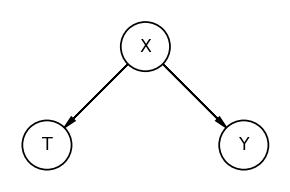

In [8]:
dag5m1 = init_dag()
dag5m1.add_node("X", "X", 1, 1)
dag5m1.add_node("T", "T", 0, 0)
dag5m1.add_node("Y", "Y", 2, 0)
dag5m1.add_edge("X", "T")
dag5m1.add_edge("X", "Y")
dag5m1.show()

$X$ is some characteristic of patients, $T$ is the treatment, and $Y$ is whether a patient recovers. If there is no direct effect $T$ on $Y$, and we regress $T$ on $Y$, we will see non-zero coefficient. But once we add $X$ to the regression model, the slope for $T$ will vanish.

### 5M2

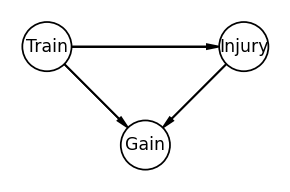

In [18]:
dag5m1 = init_dag()
dag5m1.add_node("Train", "Train", -1, 1)
dag5m1.add_node("Gain", "Gain", 0, 0)
dag5m1.add_node("Injury", "Injury", 1, 1)
dag5m1.add_edge("Train", "Gain")
dag5m1.add_edge("Injury", "Gain")
dag5m1.add_edge("Train", "Injury")
dag5m1.show()

### 5M3